In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Loarding Dataset

In [129]:
df = pd.read_csv("./rents_basel.csv")
df.head()

,id,categories,price (CHF),latitude,longitude,city,living_space (m2),num_rooms,floor,num_floors,year_built,is_new_building,is_old_building,year_last_renovated,street,postal_code
0,4001808482,"['APARTMENT', 'FLAT']",2030.0,47.544604,7.574457,Basel,69.0,3.5,NaN,5.0,1945.0,NaN,True,2020.0,Holeestrasse 10,4054
1,4001750179,"['APARTMENT', 'DUPLEX']",7860.0,47.556324,7.587249,Basel,200.0,5.5,2.0,3.0,NaN,NaN,True,2024.0,Unterer Heuberg 15,4051
2,4001750180,"['APARTMENT', 'FLAT']",3580.0,47.553728,7.586080,Basel,81.0,4.0,1.0,NaN,NaN,NaN,True,2024.0,Unterer Heuberg 15,4051
3,4001668319,"['APARTMENT', 'FLAT']",3290.0,47.569773,7.603460,Basel,95.0,4.5,3.0,NaN,NaN,True,NaN,NaN,Erlenmattstr. 83,4058
4,4001668318,"['APARTMENT', 'FLAT']",3980.0,47.569773,7.603460,Basel,130.0,5.5,1.0,NaN,NaN,True,NaN,NaN,Erlenmattstr. 83,4058


In [131]:
df.rename(
{
    'living_space (m2)':'sizes',
    'num_rooms':'rooms',
    'price (CHF)':'prices',
},
axis=1, inplace=True)

df.head()

,id,categories,prices,latitude,longitude,city,sizes,rooms,floor,num_floors,year_built,is_new_building,is_old_building,year_last_renovated,street,postal_code
0,4001808482,"['APARTMENT', 'FLAT']",2030.0,47.544604,7.574457,Basel,69.0,3.5,NaN,5.0,1945.0,NaN,True,2020.0,Holeestrasse 10,4054
1,4001750179,"['APARTMENT', 'DUPLEX']",7860.0,47.556324,7.587249,Basel,200.0,5.5,2.0,3.0,NaN,NaN,True,2024.0,Unterer Heuberg 15,4051
2,4001750180,"['APARTMENT', 'FLAT']",3580.0,47.553728,7.586080,Basel,81.0,4.0,1.0,NaN,NaN,NaN,True,2024.0,Unterer Heuberg 15,4051
3,4001668319,"['APARTMENT', 'FLAT']",3290.0,47.569773,7.603460,Basel,95.0,4.5,3.0,NaN,NaN,True,NaN,NaN,Erlenmattstr. 83,4058
4,4001668318,"['APARTMENT', 'FLAT']",3980.0,47.569773,7.603460,Basel,130.0,5.5,1.0,NaN,NaN,True,NaN,NaN,Erlenmattstr. 83,4058


In [133]:
df['floor'] = df['floor'].fillna(df['num_floors'])
df.drop(['id', 'city', 'num_floors', 'street', 'categories', 'is_new_building', 'is_old_building', 'postal_code'], axis=1, inplace=True)
df

,prices,latitude,longitude,sizes,rooms,floor,year_built,year_last_renovated
0,2030.0,47.544604,7.574457,69.0,3.5,5.0,1945.0,2020.0
1,7860.0,47.556324,7.587249,200.0,5.5,2.0,NaN,2024.0
2,3580.0,47.553728,7.586080,81.0,4.0,1.0,NaN,2024.0
3,3290.0,47.569773,7.603460,95.0,4.5,3.0,NaN,NaN
4,3980.0,47.569773,7.603460,130.0,5.5,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...
940,92.0,47.551153,7.568887,5.0,2.0,NaN,NaN,NaN
941,2570.0,47.561254,7.565575,130.0,5.0,NaN,NaN,NaN
942,1850.0,47.574254,7.593065,NaN,3.5,NaN,NaN,NaN
943,NaN,47.569443,7.593381,62.0,3.5,2.0,NaN,NaN


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   prices               934 non-null    float64
 1   latitude             945 non-null    float64
 2   longitude            945 non-null    float64
 3   sizes                839 non-null    float64
 4   rooms                903 non-null    float64
 5   floor                765 non-null    float64
 6   year_built           430 non-null    float64
 7   year_last_renovated  285 non-null    float64
dtypes: float64(8)
memory usage: 59.2 KB


In [137]:
df.isnull().sum()

prices                  11
latitude                 0
longitude                0
sizes                  106
rooms                   42
floor                  180
year_built             515
year_last_renovated    660
dtype: int64

In [143]:
# df = df.dropna(subset=['prices'])
df = df.dropna(subset=['rooms'])
# df = df.dropna(subset=['sizes'])
df.isnull().sum()

prices                   0
latitude                 0
longitude                0
sizes                    0
rooms                    0
floor                  137
year_built             423
year_last_renovated    559
dtype: int64

In [145]:
df.columns.values

array(['prices', 'latitude', 'longitude', 'sizes', 'rooms', 'floor',
       'year_built', 'year_last_renovated'], dtype=object)

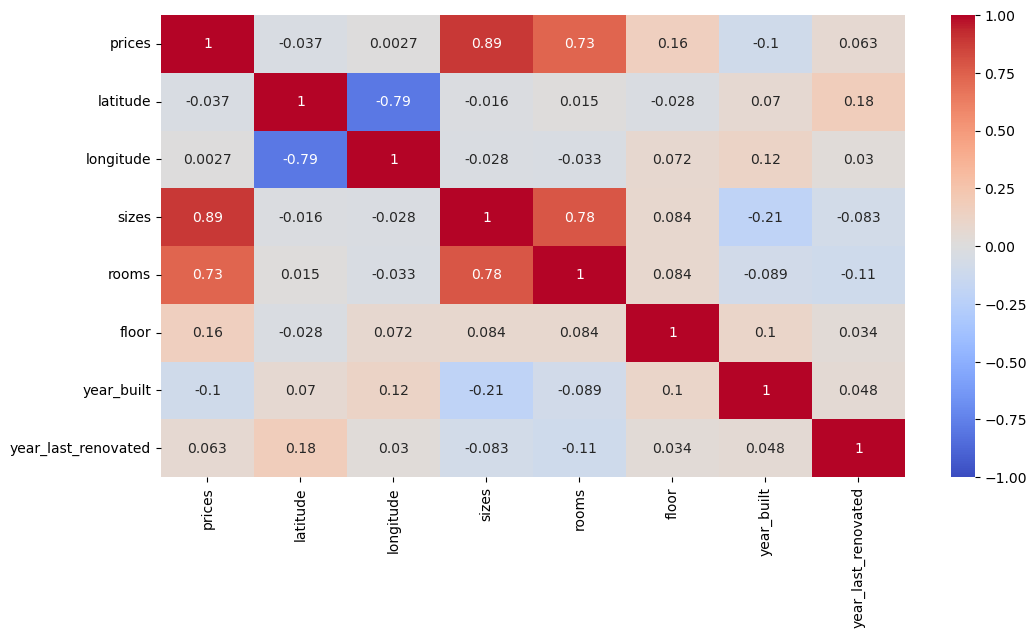

In [147]:
%matplotlib inline
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

In [250]:
correlations = df.corr()['prices'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.4 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
cols_to_drop
df_droped = df.drop(cols_to_drop, axis=1)

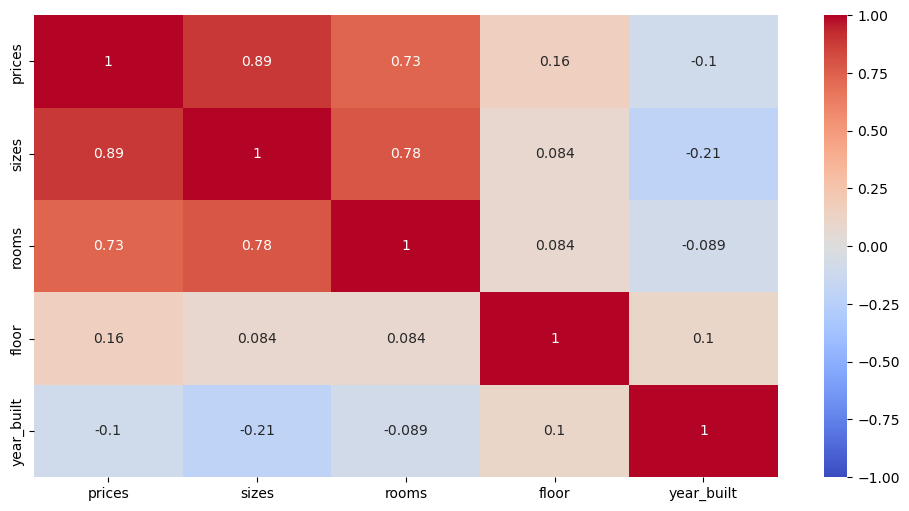

In [252]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_droped.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1) #cmap='YlGnBu'
plt.show()

In [254]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [256]:
X = df_droped.drop(['prices'], axis=1)
y = df_droped['prices']

In [258]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [260]:
x_train.shape

(645, 4)

In [262]:
y_train.shape

(645,)

In [264]:
data_training = x_train.join(y_train)

In [266]:
data_training

,sizes,rooms,floor,year_built,prices
454,85.0,3.5,2.0,1984.0,2650.0
573,130.0,5.5,3.0,1909.0,3670.0
495,97.0,4.0,2.0,NaN,2520.0
314,72.0,3.5,NaN,NaN,1740.0
627,63.0,3.5,4.0,1999.0,2580.0
...,...,...,...,...,...
658,12.0,2.0,3.0,NaN,1210.0
692,93.0,4.0,2.0,2005.0,3160.0
777,78.0,4.0,5.0,NaN,2940.0
45,84.0,4.0,2.0,1958.0,2500.0


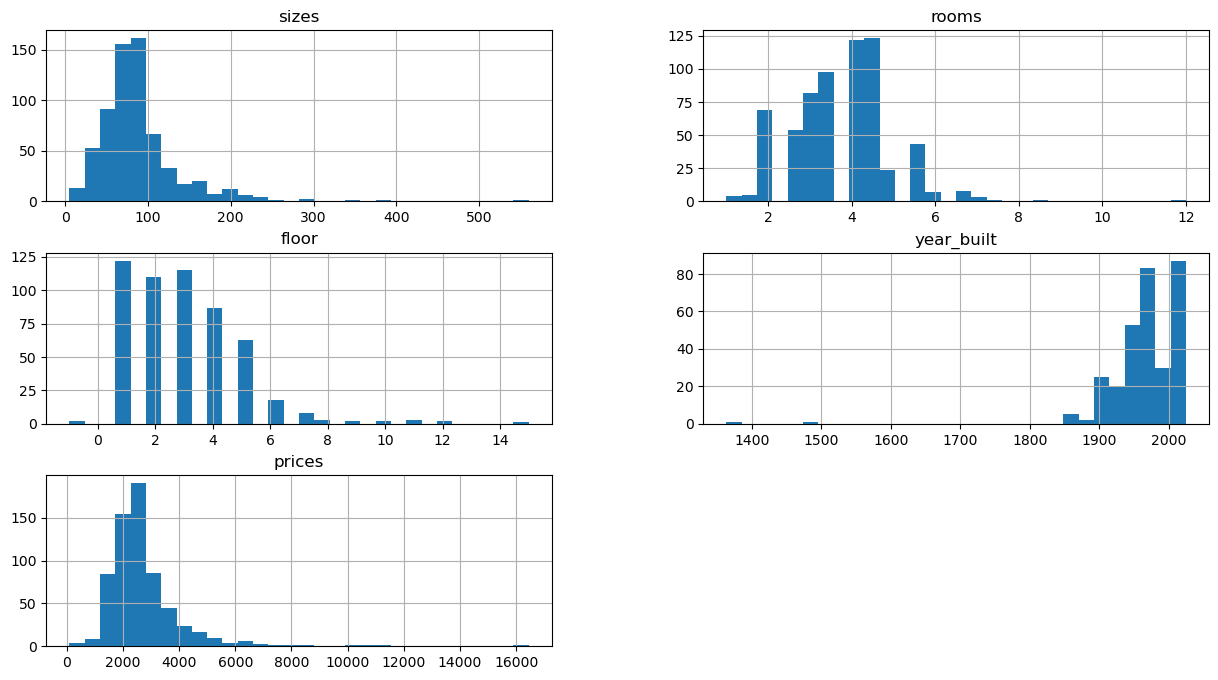

In [268]:
data_training.hist(figsize=(15, 8), bins=30)
plt.show()

In [269]:
X_train, y_train = data_training.drop(['prices'], axis=1), data_training['prices']

In [272]:
data_testing = x_test.join(y_test)

In [274]:
X_test, y_test = data_testing.drop(['prices'], axis=1), data_testing['prices']

## Random Forest Regression Model

In [277]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [279]:
rfr.score(X_test, y_test)

0.7417206452663191

In [281]:
del rfr

In [283]:
from sklearn.model_selection import GridSearchCV

In [285]:
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [400, 600, 800],
    'max_depth': [6, 8, 10],
    'min_samples_split': [4, 6, 8],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [400, 600, 800]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [286]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=6, min_samples_split=4, n_estimators=400)

In [289]:
grid_search.best_estimator_.score(X_test, y_test)

0.7896503418568641

In [291]:
del rf